In [3]:
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## K-nearest Neighbors

In [4]:
with open('./admission.txt', 'r') as f:
    reader = csv.reader(f)
    X = []
    y = []
    for row in reader:
        x1, x2, lbl = float(row[0]), float(row[1]), float(row[2])
        X.append([x1, x2])
        y.append(lbl)
X = np.array(X)
y = np.array(y)
 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 2)
(30, 2)
(70,)
(30,)


In [6]:
def classify(X, y, example, k):
    '''
    :param X: zbiór (uczący) danych postaci ndarray (m, n), gdzie m to liczba przykładów, a n liczba cech
    :param y: zbiór wartości (labels) w postaci wektora ndarray (m, ). Każdy z elementów ma wartość 0 lub 1
    :param example: wektor cech danego przykładu postaci ndarray (n, )
    :param k: parametr k algorytmu knn
    :return: predykcja klasy przykładu. 0 lub 1
    '''
    
    # 1. iteruj po wszystkich przykładach ze zbioru uczącego - X
    #     a. dla każdego z przykładów oblicz dystans między aktualnie rozważanym przykładem uczącym a przykładem example, który jest poddany klasyfikacji
    #     b. zapisz w kolekcji parę (dystans, klasa przykładu uczącego)
    # 2. posortuj kolekcję względem dystansów, rosnąco
    # 3. wybierz k pierwszych elementów (k najkrótszych dystansów)
    # 4. klasa rozważanego przykładu example będzie taka jak większość wśród k przykładów z najkrótszym dystansem
 
    list_of_distances = np.zeros((X.shape[0], 2))
 
    for idx, x in enumerate(X):
        distance = np.sqrt((x[0] - example[0]) ** 2 + (x[1] - example[1]) ** 2)
        list_of_distances[idx, 0] = distance
        list_of_distances[idx, 1] = y[idx]
            
        
    list_of_distances = np.array(sorted(list_of_distances, key = lambda pair: pair[0]))
    
    num_of_0 = 0
    num_of_1 = 0
    
    for i in range(k):
        if list_of_distances[i, 1] == 0:
            num_of_0 += 1
        else:
            num_of_1 += 1
    
    if num_of_0 > num_of_1:
        return 0
    else:
        return 1

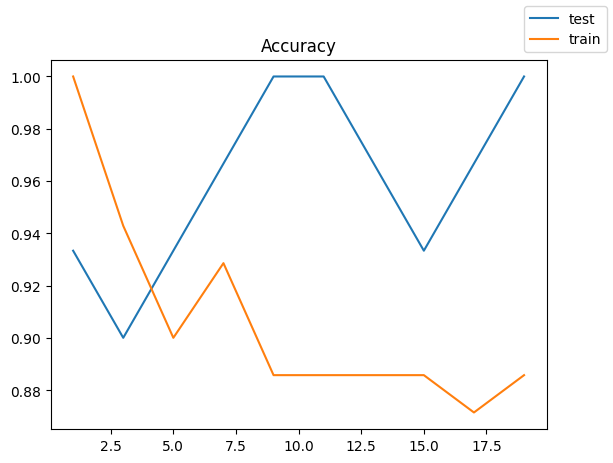

In [12]:
k_examples = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
accuracy_tab_test = []

for k in k_examples:
    y_pred = np.zeros(y_test.shape)
    for example_idx, example in enumerate(x_test):
        pred = classify(x_train, y_train, example, k)
        y_pred[example_idx] = pred
        
    temp = np.where(y_pred == y_test, 1, 0)
    
    accuracy = np.sum(temp) / y_test.shape[0]
    accuracy_tab_test.append(accuracy)

accuracy_tab_train = []

for k in k_examples:
    y_pred = np.zeros(y_train.shape)
    for example_idx, example in enumerate(x_train):
        pred = classify(x_train, y_train, example, k)
        y_pred[example_idx] = pred
        
    temp = np.where(y_pred == y_train, 1, 0)
    
    accuracy = np.sum(temp) / y_train.shape[0]
    accuracy_tab_train.append(accuracy)
    
ax = plt.figure()
plt.plot(k_examples, accuracy_tab_test)
plt.plot(k_examples, accuracy_tab_train)
plt.title("Accuracy")
ax.legend(["test", "train"])
plt.show()

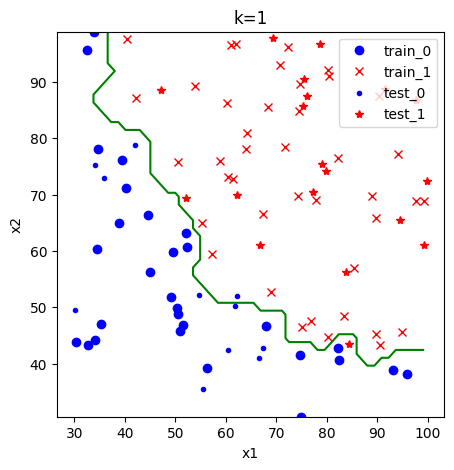

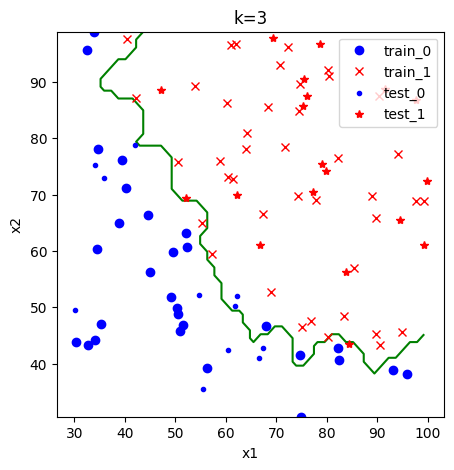

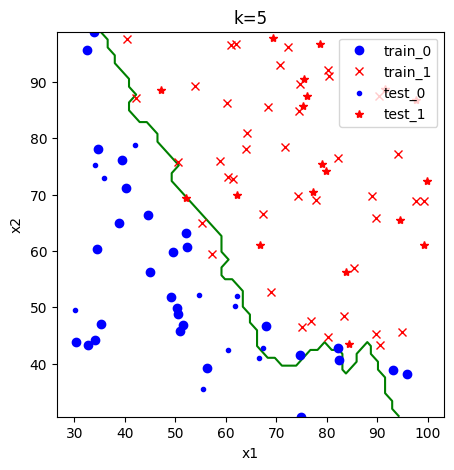

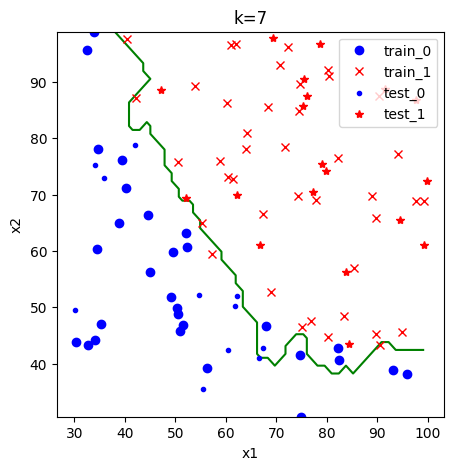

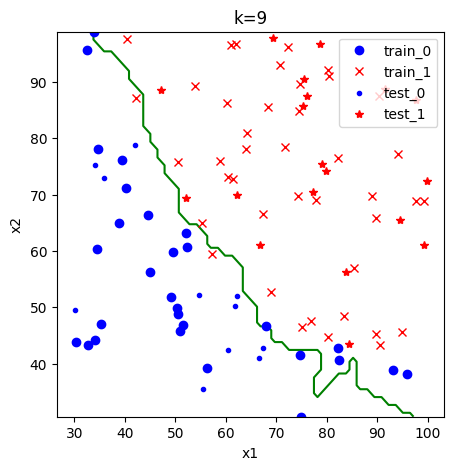

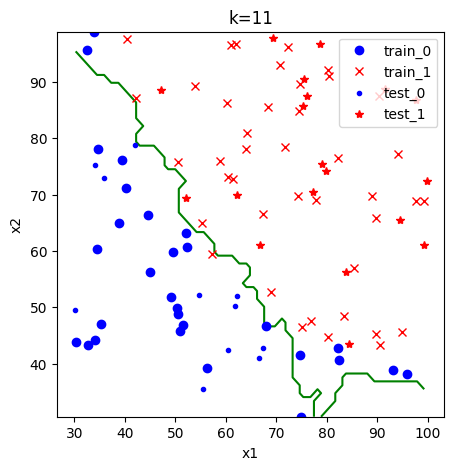

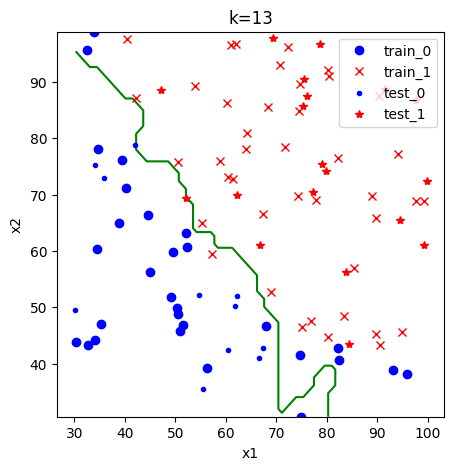

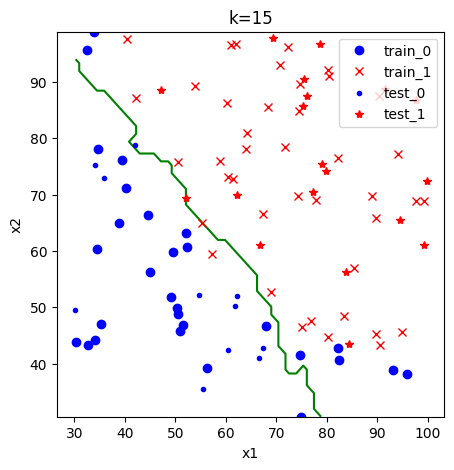

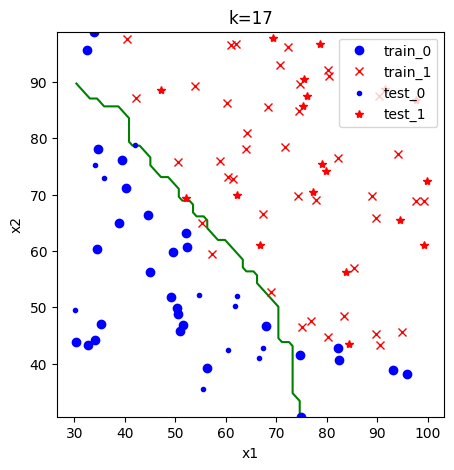

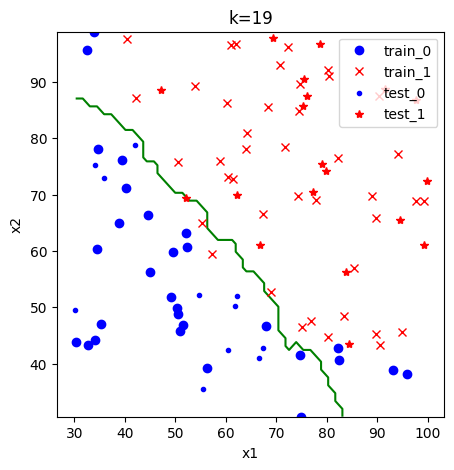

In [14]:
for k in k_examples:
    # setup plot
    plt.figure(figsize=(5, 5))
    plt.title(f'k={k}')
    plt.xlabel('x1')
    plt.ylabel('x2')
 
    # prepare data for contour plot
    x1_res = 50
    x2_res = 50
    x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
    x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
    x1x1, x2x2 = np.meshgrid(x1, x2)
    x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]
    labels_space = np.zeros((x1_res, x2_res))
    for row_idx in range(x2_res):
       for col_idx in range(x1_res):
           example = np.array([x1[col_idx], x2[row_idx]])
           pred = classify(x_train, y_train, example, k)
           labels_space[row_idx, col_idx] = pred
    # plot decision boundary
    plt.contour(x1x1, x2x2, labels_space, levels=[0.5], colors='g')
 
    # plot training set
    plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
    plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx')
 
    # plot test set
    plt.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.')
    plt.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*')
 
    plt.legend(['train_0', 'train_1', 'test_0', 'test_1'])

In [27]:
def computeAccuracy(x_train, y_train, x_test, y_test, k):    
    y_pred = np.zeros(y_test.shape)
    for example_idx, example in enumerate(x_test):
        pred = classify(x_train, y_train, example, k)
        y_pred[example_idx] = pred
        
    temp = np.where(y_pred == y_test, 1, 0)
    accuracy = np.sum(temp) / y_test.shape[0]
    
    true_positive = np.logical_and(y_pred == 1, y_test == 1).astype(int).sum()
    false_positive = np.logical_and(y_pred == 1, y_test == 0).astype(int).sum()
    
    precision = true_positive / (true_positive + false_positive)
    
    return accuracy, precision

In [29]:
accuracy, precission = computeAccuracy(x_train, y_train, x_test, y_test, 7)
print(f"Accuracy: {accuracy}", f"Precision: {precission}", sep="\n")

19 1
Accuracy: 0.9666666666666667
Precision: 0.95


## K-nearest Neighbors Scikit-learn

In [32]:
from sklearn.neighbors import KNeighborsClassifier

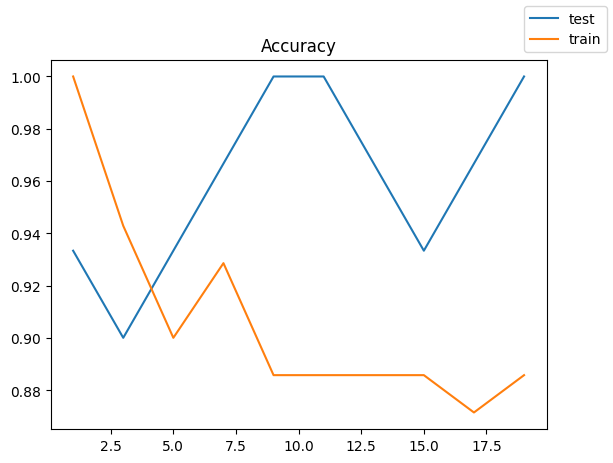

In [33]:
k_examples = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
accuracy_tab_test = []
accuracy_tab_train = []

for k in k_examples:
    knn_classifier = KNeighborsClassifier(k)
    knn_classifier.fit(x_train, y_train)
    y_pred = knn_classifier.predict(x_train)    
    temp = np.where(y_pred == y_train, 1, 0)
    
    accuracy = np.sum(temp) / y_train.shape[0]
    accuracy_tab_train.append(accuracy)

    y_pred_test = knn_classifier.predict(x_test)
    temp = np.where(y_pred_test == y_test, 1, 0)
    
    accuracy_test = np.sum(temp) / y_test.shape[0]
    accuracy_tab_test.append(accuracy_test)
    
ax = plt.figure()
plt.plot(k_examples, accuracy_tab_test)
plt.plot(k_examples, accuracy_tab_train)
plt.title("Accuracy")
ax.legend(["test", "train"])
plt.show()

## K-nearest Neighbors Scikit-learn digits dataset

In [72]:
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [66]:
data = load_digits()
y = data['target']
x = data['data']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [59]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 64)
(540, 64)
(1257,)
(540,)


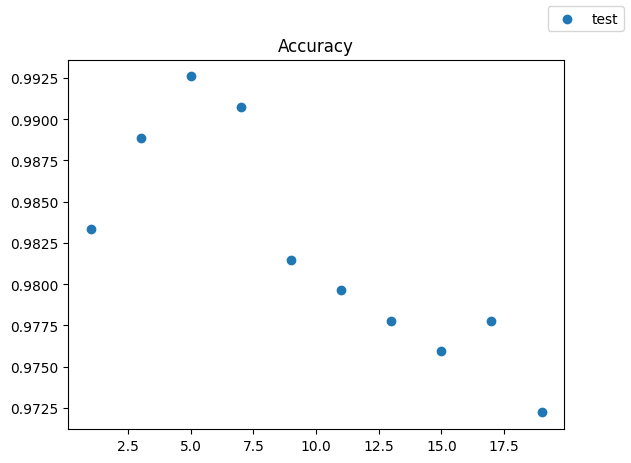

In [69]:
k_examples = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
accuracy_tab_test = []
model_tab = []

for k in k_examples:
    knn_classifier = KNeighborsClassifier(k)
    knn_classifier.fit(x_train, y_train)
    model_tab.append(knn_classifier)
    
    y_pred = knn_classifier.predict(x_test)
    temp = np.where(y_pred == y_test, 1, 0)
    
    accuracy = np.sum(temp) / y_test.shape[0]
    accuracy_tab_test.append(accuracy)
    
ax = plt.figure()
plt.scatter(k_examples, accuracy_tab_test)
plt.title("Accuracy")
ax.legend(["test"])
plt.show()

In [75]:
classifier = model_tab[2]
print(classification_report(classifier.predict(x_test), y_test))
print(confusion_matrix(classifier.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       1.00      0.98      0.99        55
           4       1.00      0.98      0.99        61
           5       0.98      0.98      0.98        66
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       0.95      0.98      0.97        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  1]
 [ 0  0  0  0 60  0  0  0  0  1]
 [ 0  0  0  0  0 65  0  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0

## Decision Trees

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
with open('./admission.txt', 'r') as f:
    reader = csv.reader(f)
    X = []
    y = []
    for row in reader:
        x1, x2, lbl = float(row[0]), float(row[1]), float(row[2])
        X.append([x1, x2])
        y.append(lbl)
X = np.array(X)
y = np.array(y)
 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [135]:
levels = [1, 2, 3, 4, 5]

test_accuracy_tab = []
train_accuracy_tab = []
classifier_tab = []

for lvl in levels:
    decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=lvl)
    decision_tree.fit(x_train, y_train)
    classifier_tab.append(decision_tree)
    
    y_pred = decision_tree.predict(x_train)
    temp = np.where(y_pred == y_train, 1, 0)
    
    accuracy = np.sum(temp) / y_train.shape[0]
    train_accuracy_tab.append(accuracy)

    y_pred = decision_tree.predict(x_test)
    temp = np.where(y_pred == y_test, 1, 0)
    
    accuracy = np.sum(temp) / y_test.shape[0]
    test_accuracy_tab.append(accuracy)

In [136]:
for i in range(len(levels)):
    print(f"level: {levels[i]}, test accuracy: {test_accuracy_tab[i]}, train accuracy: {train_accuracy_tab[i]}")

level: 1, test accuracy: 0.7, train accuracy: 0.8428571428571429
level: 2, test accuracy: 0.8333333333333334, train accuracy: 0.9428571428571428
level: 3, test accuracy: 0.8333333333333334, train accuracy: 0.9857142857142858
level: 4, test accuracy: 0.8333333333333334, train accuracy: 1.0
level: 5, test accuracy: 0.8333333333333334, train accuracy: 1.0


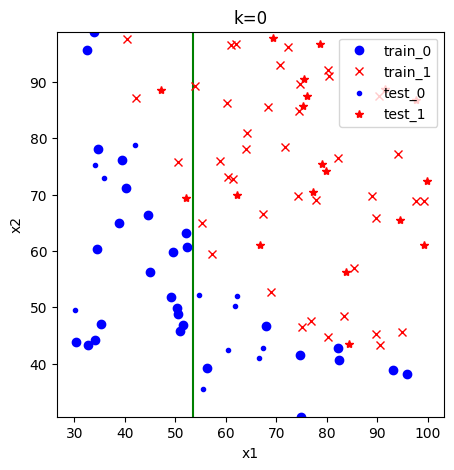

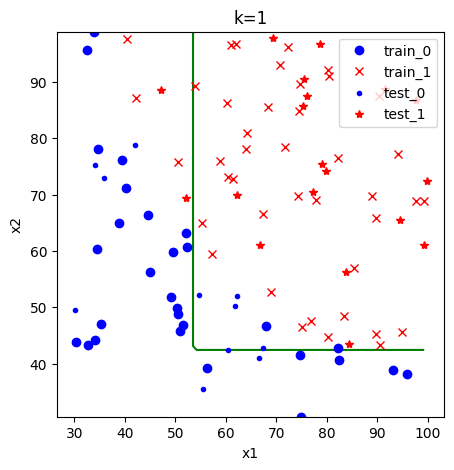

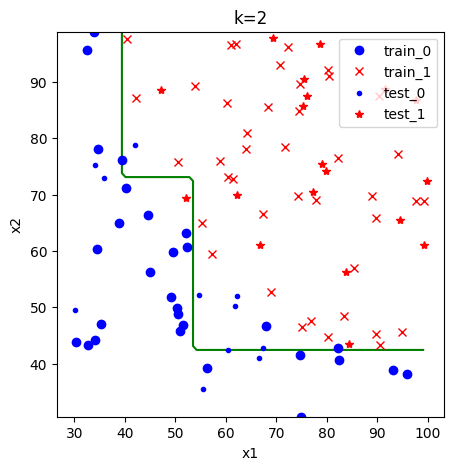

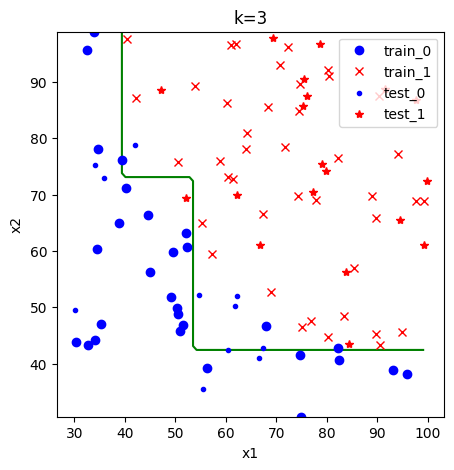

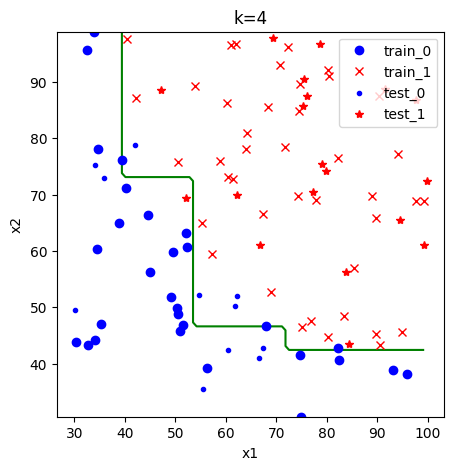

In [138]:
for k in range(len(levels)):
    # setup plot
    plt.figure(figsize=(5, 5))
    plt.title(f'k={k}')
    plt.xlabel('x1')
    plt.ylabel('x2')
 
    # prepare data for contour plot
    x1_res = 50
    x2_res = 50
    x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
    x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
    x1x1, x2x2 = np.meshgrid(x1, x2)
    x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]
    labels_space = np.zeros((x1_res, x2_res))
    
    
    # for row_idx in range(x2_res):    
    #    for col_idx in range(x1_res):
    #        example = np.array([x1[col_idx], x2[row_idx]])
    #        pred = classifier_tab[k].predict(np.reshape(example, (1, -1)))
    #        labels_space[row_idx, col_idx] = pred  
           
    for row_idx in range(x2_res):
        x1_temp = np.reshape(x1, (50, -1))
        x2_temp = np.ones(x1_temp.shape) * x2[row_idx]
        example = np.hstack((x1_temp, x2_temp))
        pred = classifier_tab[k].predict(example)
        labels_space[row_idx, :] = np.reshape(pred, (1, -1))
        
        # example = np.array([x1, x2[row_idx]])
        # print(example.shape)
        # pred = classifier_tab[k].predict(np.reshape(example, (1, -1)))
        # labels_space[row_idx, col_idx] = pred  
    
    # plot decision boundary
    plt.contour(x1x1, x2x2, labels_space, levels=[0.5], colors='g')
 
    # plot training set
    plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
    plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx')
 
    # plot test set
    plt.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.')
    plt.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*')
 
    plt.legend(['train_0', 'train_1', 'test_0', 'test_1'])